<a href="https://colab.research.google.com/github/OtusTeam/Machine-Learning/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%207%3A%20Bayesian%20Learning%2C%20PyMC/35_bayes_ab_05_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
 
@interact
def beta_plot(a=5, b=10):
     
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
 
    beta = lambda x, a, b: stats.beta.pdf(x, a, b)
    axs[0].plot(np.linspace(0, 1, 100), beta(np.linspace(0, 1, 100), a, b))
    axs[0].set_xlabel(f'f({a},{b})')
    axs[0].set_ylabel('density')
    axs[1].plot(np.linspace(0, 1, 100), beta(np.linspace(0, 1, 100), 1.005, 1.005))
    axs[1].set_xlabel('f(1,1)')
    axs[1].set_ylabel('density')
    return

interactive(children=(IntSlider(value=5, description='a', max=15, min=-5), IntSlider(value=10, description='b'…

In [ ]:
data = {
    'variation_a': {
        'c': np.array([1642, 1660, 1728, 1878, 1234, 1320, 1826, 2768, 2940, 3016, 2060,
                       3072, 1984, 1544, 1496, 1372, 2278, 2314, 2284, 1452, 1810, 2162,
                       1410, 1294, 2096, 1366, 1262, 1022, 1444, 1114, 1688, 2362, 1210,
                       1518, 3646, 1954, 2146, 2100, 2794, 2064, 1886, 1732, 2878, 1700,
                       1968, 1430, 1254, 1642, 1558, 1148, 1282, 1264, 1568, 2254, 1416,
                       1778, 2072, 2248, 1682, 1152, 1540, 1270, 1848, 1928, 1464, 1746,
                       2222, 1184, 1170,   62], 
                      dtype=np.float),
        'n': np.array([24186, 22240, 21915, 24046, 21620, 21651, 22624, 25476, 24232,
                       26996, 24418, 26906, 21262, 20247, 21377, 21237, 26087, 25624,
                       24754, 23289, 21968, 21819, 20614, 18778, 23902, 21089, 19599,
                       16136, 19584, 16925, 23675, 26319, 20691, 21535, 25220, 22885,
                       24725, 25090, 26551, 24389, 23229, 24359, 25755, 25270, 23617,
                       21501, 24459, 23413, 21180, 19490, 28164, 19612, 21427, 27168,
                       25076, 25819, 26386, 26784, 23879, 24669, 22962, 24776, 23591,
                       20815, 22421, 25605, 24855, 20280, 22752,   716], 
                      dtype=np.float)
    },
    'variation_b': {
        'c': np.array([1714, 1778, 1848, 2008, 1270, 1372, 1868, 2872, 3014, 3110, 2094,
                       3278, 1982, 1648, 1500, 1362, 2582, 2326, 2386, 1540, 1892, 2160,
                       1476, 1336, 2108, 1418, 1252, 1078, 1550, 1156, 1860, 2288, 1228,
                       1602, 3766, 2000, 2320, 2166, 3010, 2010, 1928, 1890, 2960, 1716,
                       1950, 1534, 1418, 1796, 1522, 1224, 1346, 1350, 1534, 2436, 1404,
                       1790, 2180, 2574, 1824, 1162, 1586, 1390, 1950, 2020, 1484, 1818,
                       2348, 1280, 1136,   60], 
                      dtype=np.float),
        'n': np.array([24909, 22986, 22953, 24896, 22284, 22563, 23196, 26238, 24871,
                       27869, 25301, 27779, 22008, 21020, 22037, 22006, 27070, 26169,
                       25518, 24043, 22593, 22195, 21015, 19337, 24448, 21765, 19933,
                       16672, 20329, 17638, 24427, 27232, 21468, 21966, 25987, 23607,
                       25487, 25926, 27237, 25163, 23965, 25037, 26214, 25999, 24272,
                       22336, 25271, 24220, 22014, 20195, 29069, 20320, 22058, 28055,
                       25992, 26678, 26949, 27701, 24951, 25561, 23766, 25646, 24677,
                       21441, 23269, 26265, 25563, 20869, 23276,   707], 
                      dtype=np.float)
    }
}

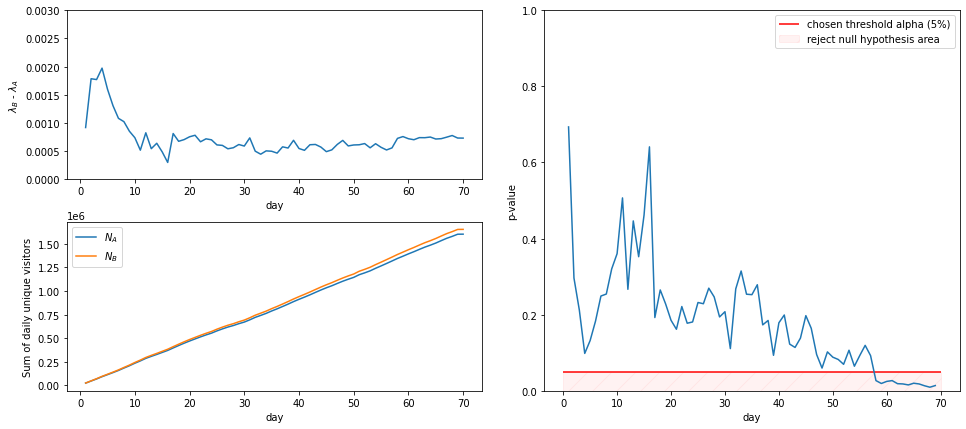

In [ ]:
cr_c = [( sum(data['variation_a']['c'][:i]) + sum(data['variation_b']['c'][:i]) ) / \
        ( sum(data['variation_a']['n'][:i]) + sum(data['variation_b']['n'][:i]) )   \
        for i in range(1, len(data['variation_a']['c'])+1)]

z = [(( sum(data['variation_b']['c'][:i]) / sum(data['variation_b']['n'][:i]) ) - \
      ( sum(data['variation_a']['c'][:i]) / sum(data['variation_a']['n'][:i]) )) / \
     np.sqrt( cr_c[i] * (1 - cr_c[i]) * ((1/sum(data['variation_a']['n'][:i])) + (1/sum(data['variation_b']['n'][:i])))) \
     for i in range(1, len(data['variation_a']['c']))]

delta_cr = [( sum(data['variation_b']['c'][:i]) / sum(data['variation_b']['n'][:i]) ) - \
            ( sum(data['variation_a']['c'][:i]) / sum(data['variation_a']['n'][:i]) )
            for i in range(1, len(data['variation_a']['c'])+1)]

na_evol = [sum(data['variation_a']['n'][:i])
           for i in range(1, len(data['variation_a']['c'])+1)]

nb_evol = [sum(data['variation_b']['n'][:i])
           for i in range(1, len(data['variation_b']['c'])+1)]

f = plt.figure(figsize=(16,7))
gs0 = gridspec.GridSpec(2, 2, figure=f, wspace=.15, hspace=.25)
ax1 = f.add_subplot(gs0[:1, :1])
ax2 = f.add_subplot(gs0[1:, :1])
ax3 = f.add_subplot(gs0[:, 1:])

ax1.plot(range(1, len(delta_cr)+1), delta_cr)
ax1.set_ylim(0, 0.003)
ax1.set_xlabel('day')
ax1.set_ylabel('$\lambda_B$ - $\lambda_A$')

ax2.plot(range(1, len(delta_cr)+1), na_evol, label='$N_A$')
ax2.plot(range(1, len(delta_cr)+1), nb_evol, label='$N_B$')
ax2.set_xlabel('day')
ax2.set_ylabel('Sum of daily unique visitors')
ax2.legend()

ax3.plot(range(1, len(z)+1), 2 * (1 - stats.norm.cdf(z)))
ax3.hlines(.05, 0, 70, color='red', label='chosen threshold alpha (5%)')
ax3.set_xlabel('day')
ax3.set_ylabel('p-value')
ax3.set_ylim(0,1)
ax3.fill_between(range(0, 71), .05, alpha=.05, color='red', hatch= '/', label='reject null hypothesis area')
ax3.legend()

plt.show()

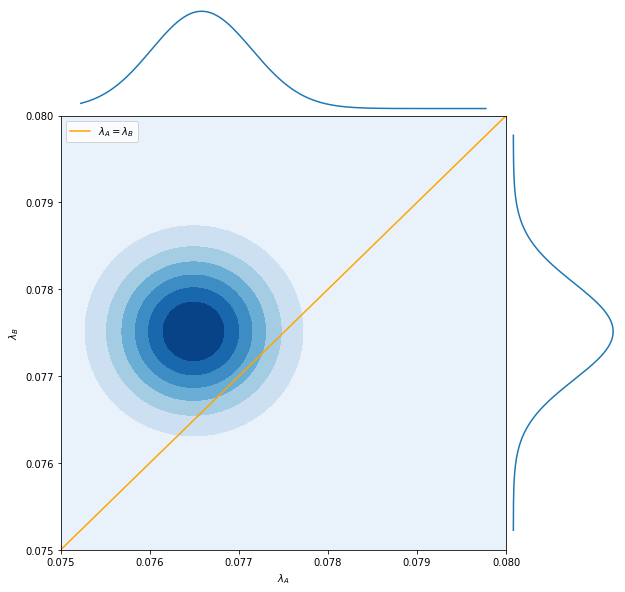

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

N_plot = 1000
day = 8

X = np.linspace(0.075,.08,N_plot)

posterior_a = stats.beta.pdf(X, 
                             1+sum(data['variation_a']['c'][:day]),
                             1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])))
posterior_b = stats.beta.pdf(X, 
                             1+sum(data['variation_b']['c'][:day]),
                             1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])))

A, B = np.meshgrid(posterior_a, posterior_b)

Z = A * B

f = plt.figure(figsize=(12,10))
gs0 = gridspec.GridSpec(5, 6, figure=f, wspace=.02, hspace=.02)
ax1 = f.add_subplot(gs0[1:, :-2])
ax2 = f.add_subplot(gs0[:1, :-2])
ax3 = f.add_subplot(gs0[1:, -2:-1])

ax1.contourf(X, X, Z, cmap= 'Blues')
ax1.plot(X, X, color = 'orange', label = '$\lambda_A = \lambda_B$')
ax2.plot(X, posterior_a)
ax3.plot(posterior_b, X)

ax1.set_xlabel('$\lambda_A$')
ax1.set_ylabel('$\lambda_B$')

ax3.set_axis_off()
ax2.set_axis_off()

ax1.legend()
plt.show()

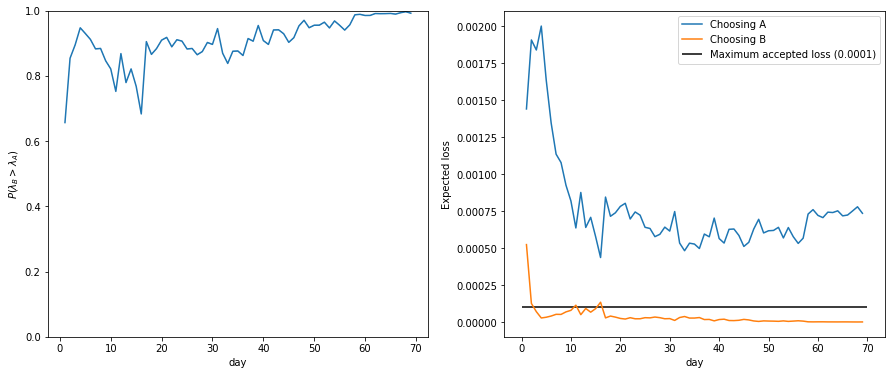

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Monte Carlo integration (importance Sampling)
N_mc = 100000

proba_b_better_a = []
proba_b_better_a_error = []
expected_loss_a = []
expected_loss_a_error = []
expected_loss_b = []
expected_loss_b_error = []

for day in range(1, 70):

    mean_a, var_a = stats.beta.stats(a=1+sum(data['variation_a']['c'][:day]), 
                                     b=1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])), 
                                     moments='mv')

    mean_b, var_b = stats.beta.stats(a=1+sum(data['variation_b']['c'][:day]), 
                                     b=1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])), 
                                     moments='mv')

    randx_a = np.random.normal(loc=mean_a, 
                             scale=1.25*np.sqrt(var_a), 
                             size=N_mc)
    randx_b = np.random.normal(loc=mean_b, 
                             scale=1.25*np.sqrt(var_b), 
                             size=N_mc)

    f_a = stats.beta.pdf(randx_a,
                       a = 1+sum(data['variation_a']['c'][:day]), 
                       b = 1+(sum(data['variation_a']['n'][:day])-sum(data['variation_a']['c'][:day])))
    f_b = stats.beta.pdf(randx_b,
                       a = 1+sum(data['variation_b']['c'][:day]), 
                       b = 1+(sum(data['variation_b']['n'][:day])-sum(data['variation_b']['c'][:day])))

    g_a = stats.norm.pdf(randx_a,
                           loc=mean_a, 
                           scale=1.25*np.sqrt(var_a))
    g_b = stats.norm.pdf(randx_b,
                           loc=mean_b, 
                           scale=1.25*np.sqrt(var_b))

    y = (f_a * f_b) / (g_a * g_b)

    y_b = y[randx_b>=randx_a]

    p = 1/N_mc * sum(y_b)
    perr = np.sqrt(1*(y_b*y_b).sum()/N_mc - (1*y_b.sum()/N_mc)**2)/np.sqrt(N_mc)

    y_loss_a = ((randx_b-randx_a)*y)[randx_b>=randx_a]
    loss_A = 1/N_mc * sum(y_loss_a)
    loss_A_err = np.sqrt(1*(y_loss_a*y_loss_a).sum()/N_mc - (1*y_loss_a.sum()/N_mc)**2)/np.sqrt(N_mc)
    
    y_loss_b = ((randx_a-randx_b)*y)[randx_a>=randx_b]
    loss_B = 1/N_mc * sum(y_loss_b)
    loss_B_err = np.sqrt(1*(y_loss_b*y_loss_b).sum()/N_mc - (1*y_loss_b.sum()/N_mc)**2)/np.sqrt(N_mc)    
    
    proba_b_better_a.append(p)
    proba_b_better_a_error.append(perr)
    
    expected_loss_a.append(loss_A)
    expected_loss_a_error.append(loss_A_err)
    
    expected_loss_b.append(loss_B)
    expected_loss_b_error.append(loss_B_err)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_ylim(0,1)
axs[0].plot(range(1, 70), proba_b_better_a)
axs[0].fill_between(range(1, 70), 
                 np.array(proba_b_better_a) - np.array(proba_b_better_a_error), 
                 np.array(proba_b_better_a) + np.array(proba_b_better_a_error), 
                 alpha = .5)

axs[1].plot(range(1, 70), expected_loss_a, label = 'Choosing A')
axs[1].fill_between(range(1, 70), 
                 np.array(expected_loss_a) - np.array(expected_loss_a_error), 
                 np.array(expected_loss_a) + np.array(expected_loss_a_error), 
                 alpha = .5)

axs[1].plot(range(1, 70), expected_loss_b, label = 'Choosing B')
axs[1].fill_between(range(1, 70), 
                 np.array(expected_loss_b) - np.array(expected_loss_b_error), 
                 np.array(expected_loss_b) + np.array(expected_loss_b_error), 
                 alpha = .5)
axs[1].hlines(.0001, 0, 70, color='black', label='Maximum accepted loss (0.0001)')

axs[0].set_ylabel('$P(\lambda_B>\lambda_A)$')
axs[0].set_xlabel('day')
axs[1].set_xlabel('day')
axs[1].set_ylabel('Expected loss')

axs[1].legend()

plt.show()